## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

I will load the blobs.tif image and display it using stackview.insight.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
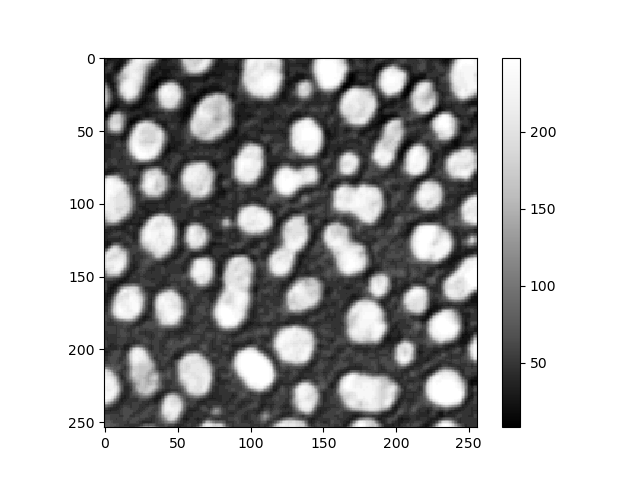
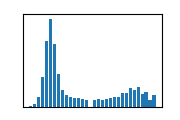

In [3]:
from skimage.io import imread
import stackview

image = imread('blobs.tif')
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

I will load the blobs.tif grayscale image, segment the nuclei-like objects using Otsu's method and connected component labeling, measure the area of the segmented labels, and display the image with the area printed on top of each label.



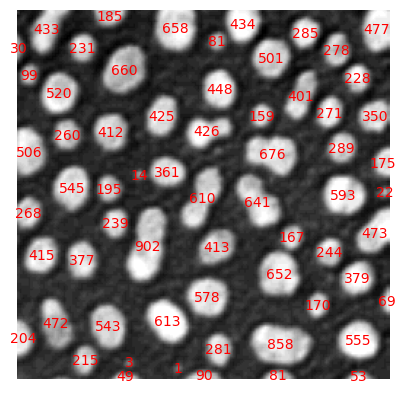

In [5]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the image
image = imread('blobs.tif')

# Segment the nuclei-like objects
threshold = threshold_otsu(image)
binary = image > threshold
labels = label(binary)

# Measure the area of each label
properties = regionprops(labels, image)

# Display the image with the area printed on top of each label
plt.imshow(image, cmap='gray')
for prop in properties:
    y, x = prop.centroid
    plt.text(x, y, str(int(prop.area)), color='red', ha='center', va='center')
plt.axis('off')
plt.show()

In [6]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

I will expand the labels in the segmented label image by 4 pixels and display the resulting label image alone.



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
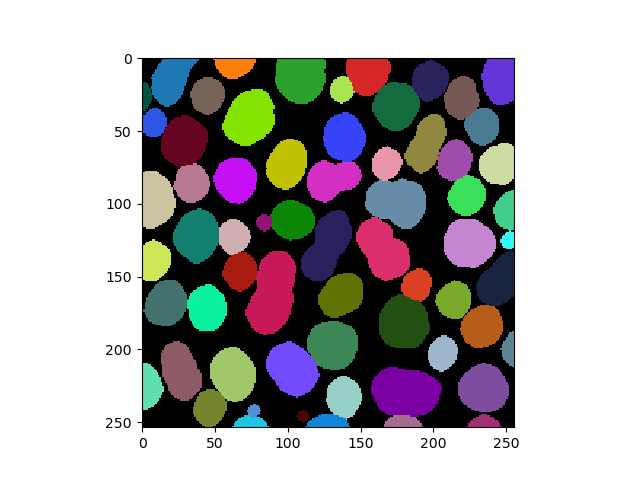

In [7]:
from skimage.segmentation import expand_labels
import stackview

expanded_labels = expand_labels(labels, distance=4)
stackview.insight(expanded_labels)